In [1]:
from swift_control.data import (
    create_grid_data,
    training_data_gen,
    xdot_training_data_gen,
)
from swift_control.eval import eval_cs
from swift_control.train import train_episodic
from plant_factory import ControllerFactory
import numpy as np
import mosek

In [2]:
swift_path = "/share/dean/fast_control/models/swift_grid/"
plant_conf = swift_path + "base_config.toml"

x_0 = np.array([2.0, 0.0, 0.0, 0.0])

plant = ControllerFactory(plant_conf)
kwargs = x_0, plant.episodic_T, plant.episodic_num_steps

oracle_cs, ts = eval_cs(plant.system, plant.oracle_controller, *kwargs)
qp_cs, _ = eval_cs(plant.system, plant.qp_controller, *kwargs)


c_cdot = 0

In [3]:
confs = []
gp_controller_pair = []
gp_cs = []
names = []
for i in range(1, 5):
    model_conf = swift_path + f"m{i}_config.toml"
    gp_controller, gp = train_episodic(plant, model_conf, x_0)
    model_cs, _ = eval_cs(plant.system, gp_controller, *kwargs)

    confs.append(model_conf)
    gp_controller_pair.append((gp_controller, gp))
    gp_cs.append(model_cs)
    names.append(gp_controller.name)

data size:99, calculated rf_d is: 24


 10%|█         | 1/10 [00:03<00:30,  3.34s/it]

data size:198, calculated rf_d is: 44
iteration 0 done


 20%|██        | 2/10 [00:06<00:27,  3.48s/it]

data size:297, calculated rf_d is: 68
iteration 1 done


 30%|███       | 3/10 [00:09<00:23,  3.30s/it]

data size:396, calculated rf_d is: 88
iteration 2 done


 40%|████      | 4/10 [00:13<00:19,  3.31s/it]

data size:495, calculated rf_d is: 112
iteration 3 done
data size:594, calculated rf_d is: 132


 50%|█████     | 5/10 [00:16<00:16,  3.36s/it]

iteration 4 done


 60%|██████    | 6/10 [00:20<00:13,  3.42s/it]

data size:693, calculated rf_d is: 156
iteration 5 done


 70%|███████   | 7/10 [00:23<00:10,  3.41s/it]

data size:792, calculated rf_d is: 176
iteration 6 done


 80%|████████  | 8/10 [00:26<00:06,  3.37s/it]

data size:891, calculated rf_d is: 200
iteration 7 done


 90%|█████████ | 9/10 [00:30<00:03,  3.28s/it]

data size:990, calculated rf_d is: 220
iteration 8 done


100%|██████████| 10/10 [00:33<00:00,  3.32s/it]

data size:1089, calculated rf_d is: 244
iteration 9 done


data size:99, calculated rf_d is: 24


 10%|█         | 1/10 [00:03<00:29,  3.25s/it]

data size:198, calculated rf_d is: 44
iteration 0 done


 20%|██        | 2/10 [00:06<00:24,  3.10s/it]

data size:297, calculated rf_d is: 68
iteration 1 done


 30%|███       | 3/10 [00:09<00:23,  3.29s/it]

data size:396, calculated rf_d is: 88
iteration 2 done


 40%|████      | 4/10 [00:12<00:19,  3.22s/it]

data size:495, calculated rf_d is: 112
iteration 3 done


 50%|█████     | 5/10 [00:15<00:15,  3.15s/it]

data size:594, calculated rf_d is: 132
iteration 4 done
data size:693, calculated rf_d is: 156


 60%|██████    | 6/10 [00:19<00:13,  3.40s/it]

iteration 5 done
data size:792, calculated rf_d is: 176


 70%|███████   | 7/10 [00:23<00:10,  3.41s/it]

iteration 6 done


 80%|████████  | 8/10 [00:26<00:06,  3.35s/it]

data size:891, calculated rf_d is: 200
iteration 7 done
data size:990, calculated rf_d is: 220


 90%|█████████ | 9/10 [00:29<00:03,  3.40s/it]

iteration 8 done
data size:1089, calculated rf_d is: 244


100%|██████████| 10/10 [00:35<00:00,  3.50s/it]

iteration 9 done


data size:99, calculated rf_d is: 24


 10%|█         | 1/10 [00:03<00:33,  3.72s/it]

data size:198, calculated rf_d is: 44
iteration 0 done


 20%|██        | 2/10 [00:07<00:29,  3.70s/it]

data size:297, calculated rf_d is: 68
iteration 1 done


 30%|███       | 3/10 [00:10<00:24,  3.57s/it]

data size:396, calculated rf_d is: 88
iteration 2 done
data size:495, calculated rf_d is: 112


 40%|████      | 4/10 [00:14<00:21,  3.54s/it]

iteration 3 done


 50%|█████     | 5/10 [00:17<00:17,  3.41s/it]

data size:594, calculated rf_d is: 132
iteration 4 done


 60%|██████    | 6/10 [00:20<00:13,  3.31s/it]

data size:693, calculated rf_d is: 156
iteration 5 done


 70%|███████   | 7/10 [00:23<00:09,  3.25s/it]

data size:792, calculated rf_d is: 176
iteration 6 done


 80%|████████  | 8/10 [00:26<00:06,  3.18s/it]

data size:891, calculated rf_d is: 200
iteration 7 done
data size:990, calculated rf_d is: 220


 90%|█████████ | 9/10 [00:30<00:03,  3.48s/it]

iteration 8 done
data size:1089, calculated rf_d is: 244


100%|██████████| 10/10 [00:35<00:00,  3.53s/it]

iteration 9 done


data size:99, calculated rf_d is: 24


  0%|          | 0/10 [00:00<?, ?it/s]

data size:198, calculated rf_d is: 44


 10%|█         | 1/10 [00:03<00:29,  3.28s/it]

iteration 0 done


 20%|██        | 2/10 [00:06<00:27,  3.41s/it]

data size:297, calculated rf_d is: 68
iteration 1 done


 30%|███       | 3/10 [00:10<00:24,  3.51s/it]

data size:396, calculated rf_d is: 88
iteration 2 done


 40%|████      | 4/10 [00:13<00:19,  3.33s/it]

data size:495, calculated rf_d is: 112
iteration 3 done


 50%|█████     | 5/10 [00:16<00:16,  3.22s/it]

data size:594, calculated rf_d is: 132
iteration 4 done


 60%|██████    | 6/10 [00:19<00:12,  3.15s/it]

data size:693, calculated rf_d is: 156
iteration 5 done


 70%|███████   | 7/10 [00:22<00:09,  3.16s/it]

data size:792, calculated rf_d is: 176
iteration 6 done


 80%|████████  | 8/10 [00:25<00:06,  3.14s/it]

data size:891, calculated rf_d is: 200
iteration 7 done
data size:990, calculated rf_d is: 220


 90%|█████████ | 9/10 [00:29<00:03,  3.43s/it]

iteration 8 done
data size:1089, calculated rf_d is: 244


100%|██████████| 10/10 [00:33<00:00,  3.36s/it]

iteration 9 done


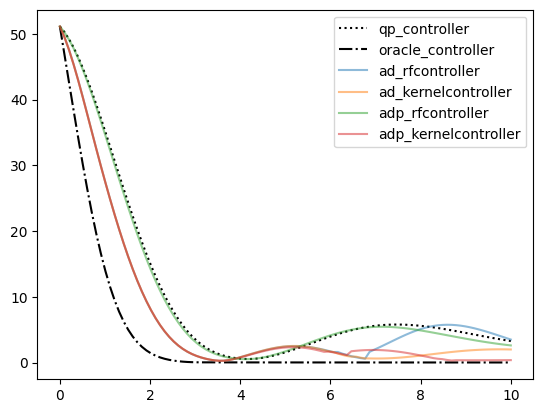

In [5]:
import seaborn as sns

sns.lineplot(
    x=ts,
    y=qp_cs[c_cdot],
    linestyle="dotted",
    color="black",
    label="qp_controller",
)
sns.lineplot(
    x=ts,
    y=oracle_cs[c_cdot],
    linestyle="dashdot",
    color="black",
    label="oracle_controller",
)
for model_cs, name in zip(gp_cs, names):
    sns.lineplot(
        x=ts,
        y=model_cs[c_cdot],
        label=name,
        alpha=0.5,
    )